In [1]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload() 

Saving 311_Service_Requests_from_2010_to_Present.csv to 311_Service_Requests_from_2010_to_Present.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import chi2_contingency 

import statsmodels.api as sm
from statsmodels.formula.api import ols

#Visualising the dataset

In [61]:
data = pd.read_csv(io.BytesIO(uploaded['311_Service_Requests_from_2010_to_Present.csv']))

In [62]:
pd.set_option('display.max_columns',None)

In [63]:
#Get Statistical details of data
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [64]:
#shape of dataset
print("shape of dataframe is : ", data.shape)

shape of dataframe is :  (364558, 53)


In [65]:
# summary of data
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


#Data Exploratory analysis

##Draw a frequency plot to show the number of null values in each column of the DataFrame

In [66]:
null_df = data.isnull()

In [67]:
null_counts = null_df.sum()

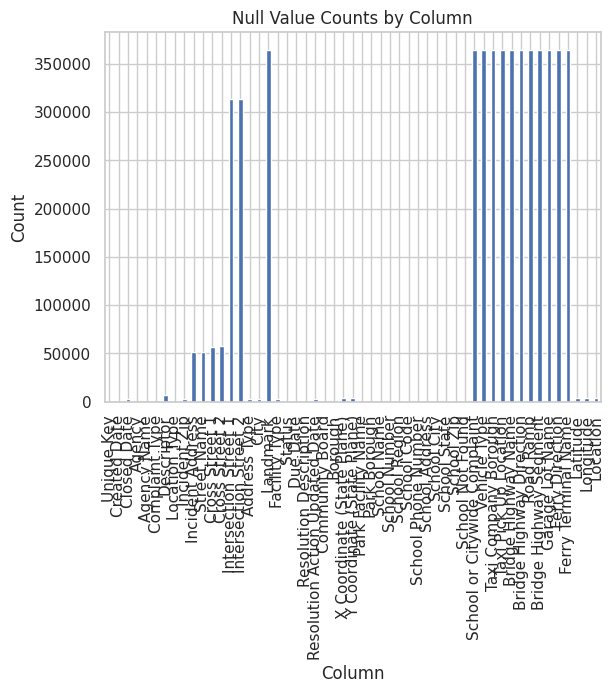

In [68]:
null_counts.plot(kind='bar')
plt.title('Null Value Counts by Column')
plt.xlabel('Column')
plt.ylabel('Count')
plt.show()


##Missing value treatment

In [71]:
# drop rows with null values in the 'Closed Date' column
data = data.dropna(subset=['Closed Date'], how='any')
print(data.shape)

(362177, 53)


##Analyze the date column, and remove entries that have an incorrect timeline

###Calculate the time elapsed in closed and creation date

In [72]:
# convert 'Closed Date' and 'Creation Date' to datetime objects
data['Closed Date'] = pd.to_datetime(data['Closed Date'])
data['Created Date'] = pd.to_datetime(data['Created Date'])

In [73]:
data["Request_Closing_Time"]=(data["Closed Date"]-data["Created Date"])

Request_Closing_Time=[]
for x in (data["Closed Date"]-data["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
data["Request_Closing_Time"]=Request_Closing_Time

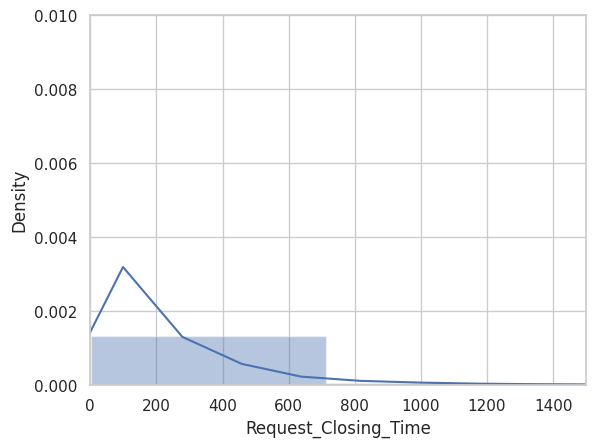

In [74]:
#Univariate Distribution Plot for Request Closing Time
sns.distplot(data["Request_Closing_Time"])
plt.xlim((0,1500))
plt.ylim((0,0.010))
plt.show()

In [75]:
# view the descriptive statistics for the time elapsed column
print(data['Request_Closing_Time'].describe())

count    362177.000000
mean        251.888327
std         351.709125
min           1.016667
25%          75.550000
50%         160.266667
75%         314.633333
max       35572.366667
Name: Request_Closing_Time, dtype: float64


'''More than 75% of the complaints have been closed within 300 mins i.e 5 hours

In [76]:
# count the number of null values in the 'Complaint_Type' and 'City' columns
complaint_type_nulls = data['Complaint Type'].isnull().sum()
city_nulls = data['City'].isnull().sum()

# print the results
print(f"Number of null values in 'Complaint_Type': {complaint_type_nulls}")
print(f"Number of null values in 'City': {city_nulls}")

#filling the null values in City as ' Unknown City'
data['City'].fillna('Unknown City',inplace=True)

Number of null values in 'Complaint_Type': 0
Number of null values in 'City': 674


###Draw a frequency plot for the complaints in each city

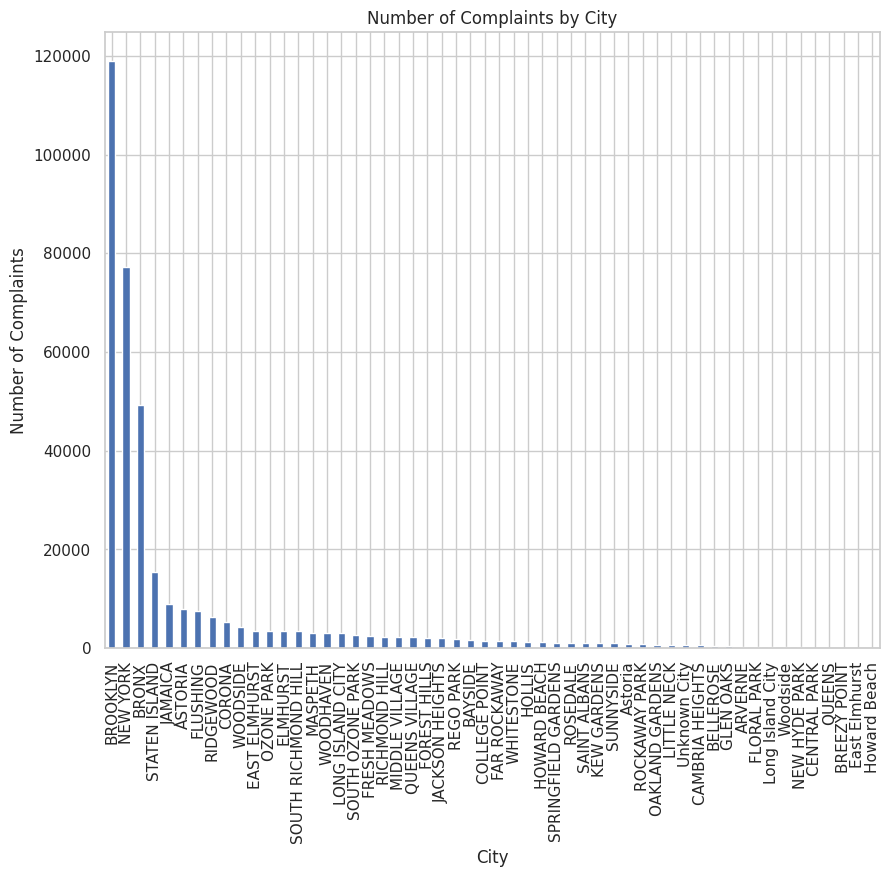

In [85]:
# count the number of complaints in each city
complaints_by_city = data['City'].value_counts()

# create a bar plot of the results
plt.figure(figsize=(10,8))
complaints_by_city.plot(kind='bar')
plt.title('Number of Complaints by City')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.show()


## Concentration of complaints across Brooklyn

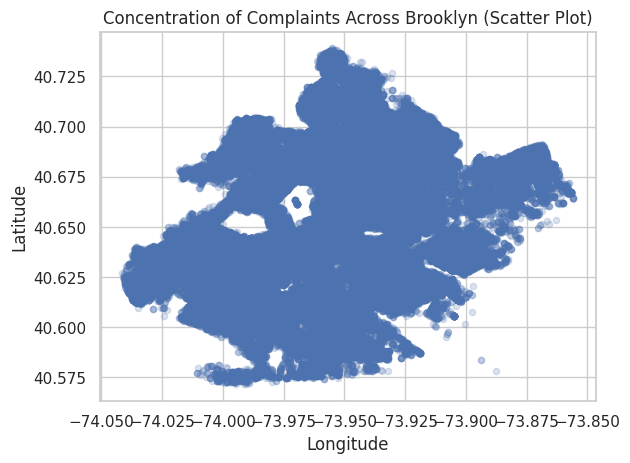

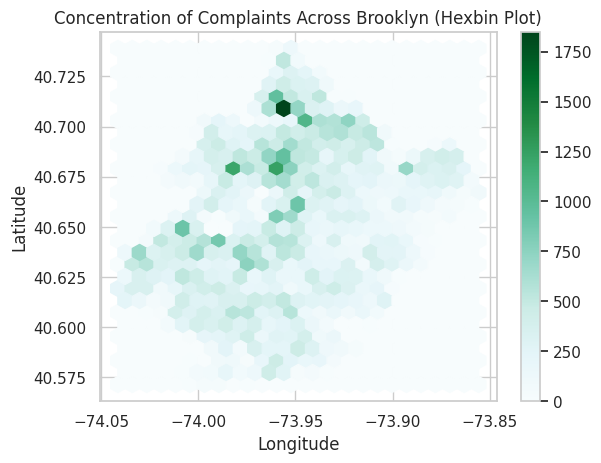

In [86]:
# filter to only include rows where 'Borough' is 'BROOKLYN'
brooklyn_df = data[data['Borough'] == 'BROOKLYN']

# create a scatter plot of the concentration of complaints across Brooklyn
brooklyn_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2)
plt.title('Concentration of Complaints Across Brooklyn (Scatter Plot)')
plt.show()

# create a hexbin plot of the concentration of complaints across Brooklyn
brooklyn_df.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=25)
plt.title('Concentration of Complaints Across Brooklyn (Hexbin Plot)')
plt.show()


#Find major types of complaints

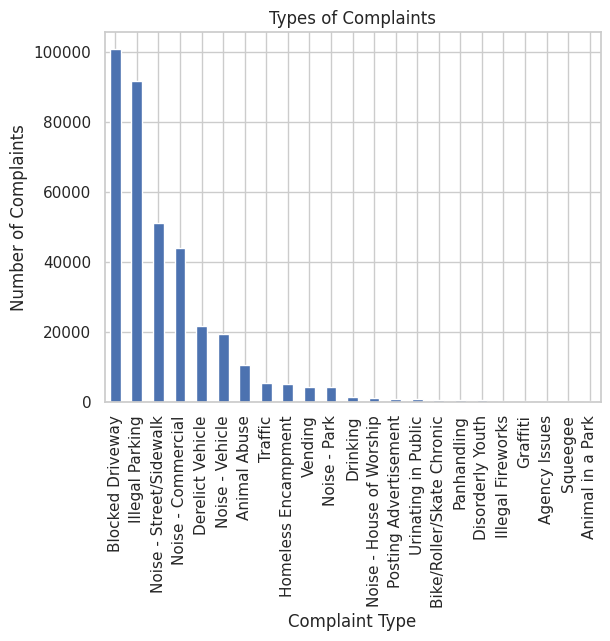

In [87]:
# create a bar plot of the types of complaints
complaints_by_type = data['Complaint Type'].value_counts()
complaints_by_type.plot(kind='bar')
plt.title('Types of Complaints')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.show()


In [88]:
# count the number of occurrences of each unique complaint type and sort in descending order
complaints_by_type = data['Complaint Type'].value_counts().sort_values(ascending=False)

# print the top 10 complaint types
print(complaints_by_type.head(10))

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64


In [89]:
# group the DataFrame by 'City' and 'Complaint_Type', and count the number of occurrences
complaints_by_city = data.groupby(['City', 'Complaint Type']).size().reset_index(name='Count')

# print the resulting DataFrame
print(complaints_by_city)


         City           Complaint Type  Count
0     ARVERNE             Animal Abuse     46
1     ARVERNE         Blocked Driveway     50
2     ARVERNE         Derelict Vehicle     32
3     ARVERNE         Disorderly Youth      2
4     ARVERNE                 Drinking      1
..        ...                      ...    ...
787  Woodside         Blocked Driveway     27
788  Woodside         Derelict Vehicle      8
789  Woodside          Illegal Parking    124
790  Woodside       Noise - Commercial      2
791  Woodside  Noise - Street/Sidewalk      5

[792 rows x 3 columns]


# Create a DataFrame, df_new, which contains cities as columns and complaint types in rows


In [90]:
# create the pivot table
df_new = pd.pivot_table(data, index='Complaint Type', columns='City', aggfunc=len, fill_value=0)

##Visualize the major types of complaints in each city

###Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints


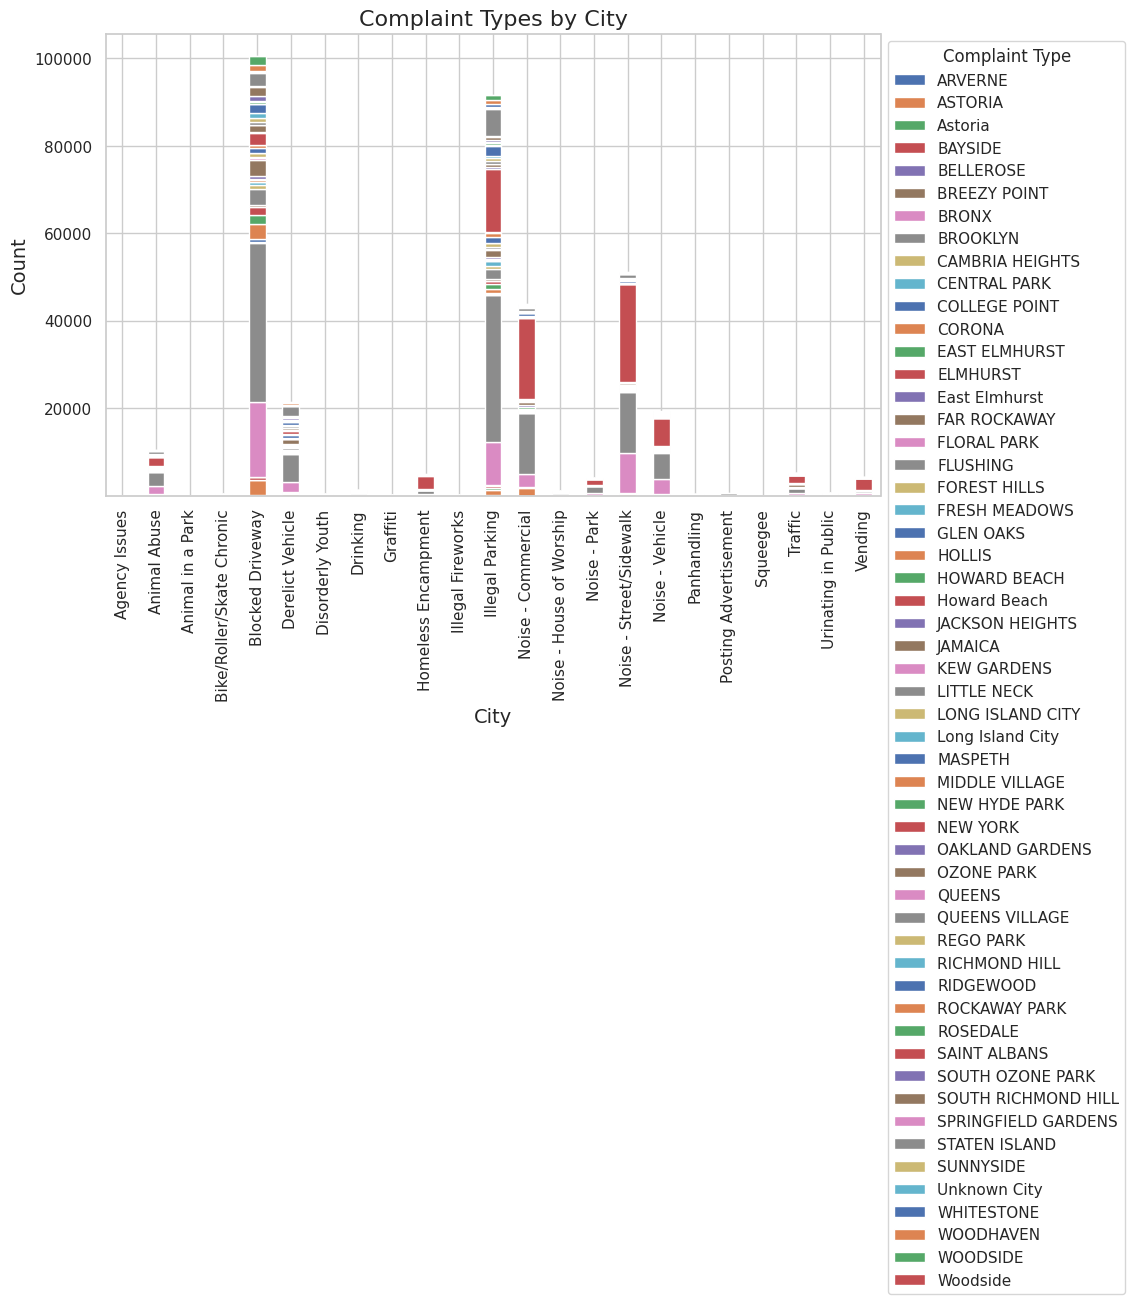

In [91]:
# create a pivot table with Complaint Type as the index, City as the columns, and Count as the values
pivot = complaints_by_city.pivot_table(values='Count', index='Complaint Type', columns='City')

# plot a stacked bar chart with different colors for each complaint type
sns.set_style('whitegrid')
ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6), rot=0)

# set the chart title and axis labels
ax.set_title('Complaint Types by City', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# add a legend
ax.legend(title='Complaint Type', bbox_to_anchor=(1, 1), loc='upper left')


 Sort the complaint types based on the average 
Request_Closing_Time grouping them for different 
locations


In [92]:
data = data.rename(columns={"Time Elapsed (Seconds)": "Request_Closing_Time"})

In [93]:
# Group the DataFrame by City and Complaint Type and calculate the average Request_Closing_Time for each group
grouped_df = data.groupby(['City', 'Complaint Type']).agg({'Request_Closing_Time': np.mean}).reset_index()


In [94]:
# Sort the DataFrame by City and average Request_Closing_Time
sorted_df = grouped_df.sort_values(['City', 'Request_Closing_Time'],ascending=[True,False])
# Print the sorted DataFrame
print(sorted_df)



         City           Complaint Type  Request_Closing_Time
3     ARVERNE         Disorderly Youth            215.475000
2     ARVERNE         Derelict Vehicle            189.900000
7     ARVERNE          Illegal Parking            140.101344
0     ARVERNE             Animal Abuse            139.986594
1     ARVERNE         Blocked Driveway            138.647333
..        ...                      ...                   ...
788  Woodside         Derelict Vehicle            333.241667
789  Woodside          Illegal Parking            288.224328
787  Woodside         Blocked Driveway            259.436420
791  Woodside  Noise - Street/Sidewalk            204.760000
790  Woodside       Noise - Commercial            143.650000

[792 rows x 3 columns]


In [95]:
#Request Closing Time for all City sorted in ascending Order
pd.DataFrame(data.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
City,
ARVERNE,137.840605
ROCKAWAY PARK,139.602908
LITTLE NECK,155.031437
OAKLAND GARDENS,156.240167
BAYSIDE,160.062978
FAR ROCKAWAY,161.193068
NEW YORK,175.343723
FLUSHING,177.446478
FOREST HILLS,184.097636


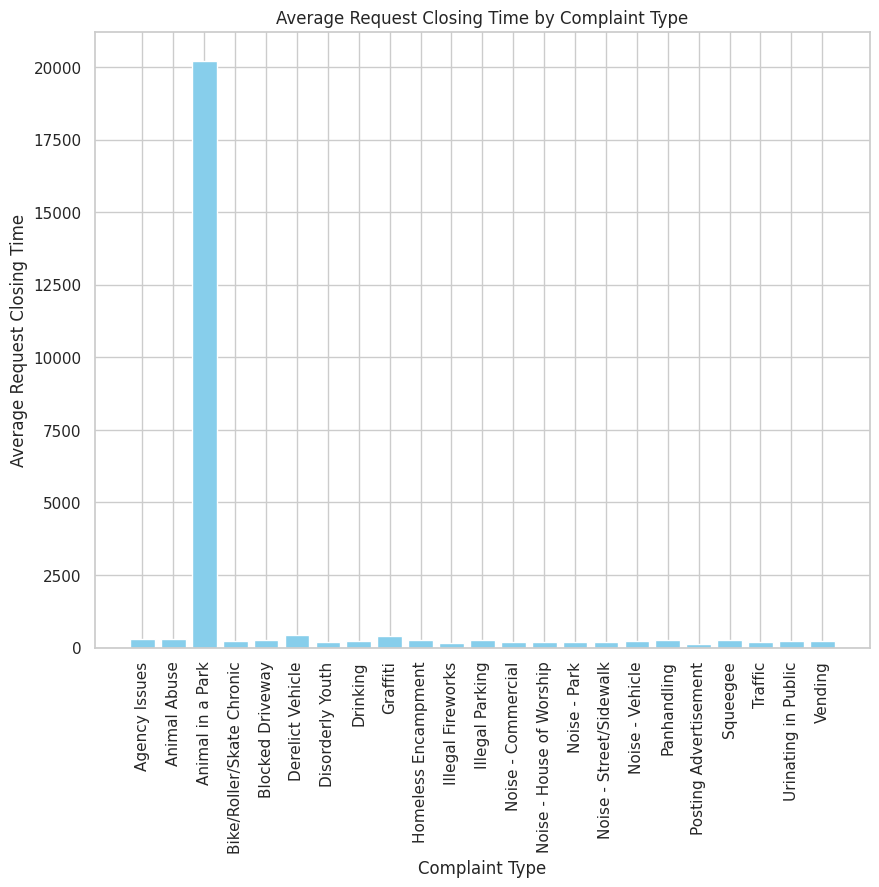

In [96]:
# calculate the average Request_Closing_Time for each Complaint_Type
avg_time = data.groupby('Complaint Type')['Request_Closing_Time'].mean()

# create the bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(avg_time.index, avg_time.values, color='skyblue')

# set the chart title and axis labels
ax.set_title('Average Request Closing Time by Complaint Type')
ax.set_xlabel('Complaint Type')
ax.set_ylabel('Average Request Closing Time')

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# display the chart
plt.show()

In [97]:
#Remove the column with very high percentage of missing value
new_df=data.loc[:,(data.isnull().sum()/data.shape[0]*100)<=50]

In [98]:
print("Old DataFrame Shape :",data.shape)
print("New DataFrame Shape : ",new_df.shape)

Old DataFrame Shape : (362177, 54)
New DataFrame Shape :  (362177, 40)


In [99]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


*We see that all the data above have not much details, are Unspecified. So we can remove those columns to ease our analysis*

---



In [100]:
new_df.drop(rem,axis=1,inplace=True)

In [101]:
new_df.shape

(362177, 26)

In [102]:
#Remove columns that are not needed for our analysis
rem1=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_df.drop(rem1,axis=1,inplace=True)

In [103]:
new_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,MANHATTAN,55.500000
1,2015-12-31 23:59:44,2016-01-01 01:26:57,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,QUEENS,87.216667
2,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,BRONX,291.566667
3,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,BRONX,465.450000
4,2015-12-31 23:56:58,2016-01-01 03:24:42,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,QUEENS,207.733333


(0.0, 2000.0)

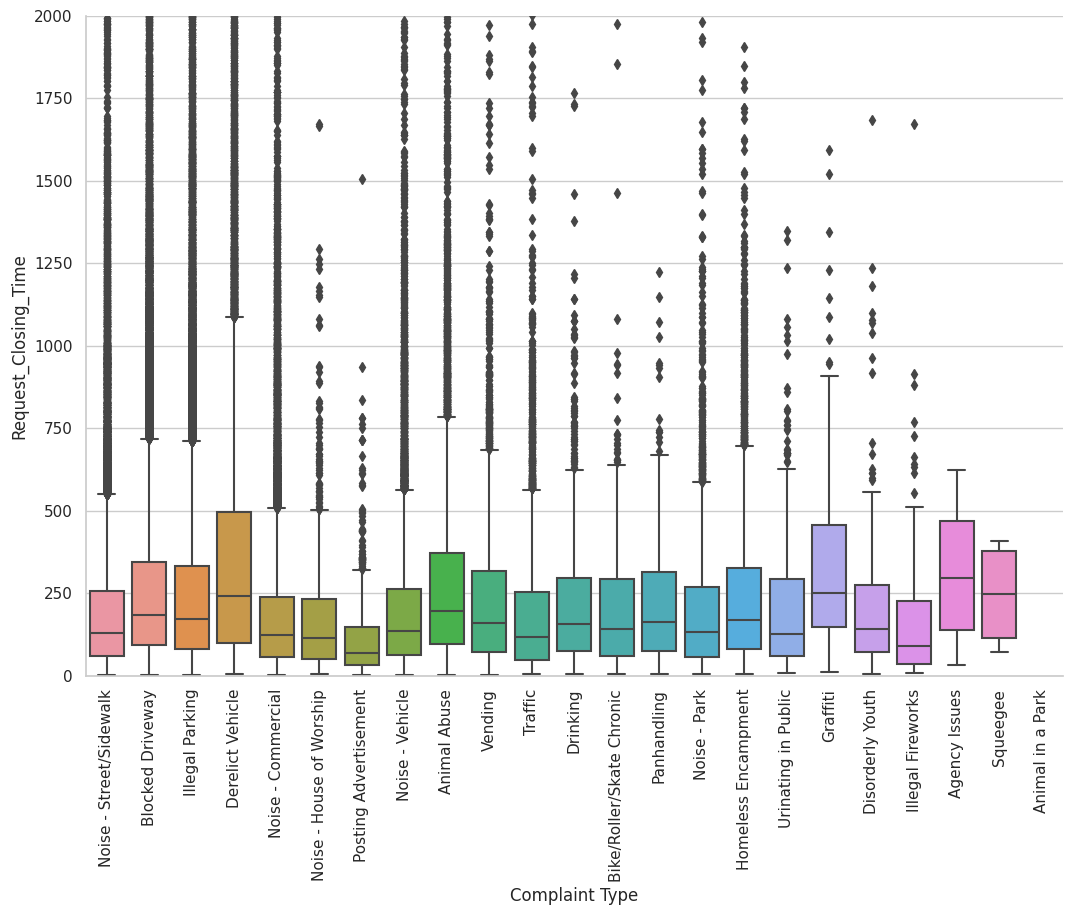

In [104]:
g=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=new_df)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

In [110]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.500000,Noise - Street/Sidewalk
1,87.216667,Blocked Driveway
2,291.566667,Blocked Driveway
3,465.450000,Illegal Parking
4,207.733333,Illegal Parking


H0: there is no significant different in mean of Request_Closing_Time for different Complaint


H1:there is signficant different in mean of Request_Closing_Time for different Complaint

In [112]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
print(lm.summary())
table=sm.stats.anova_lm(lm)
table

                             OLS Regression Results                             
Dep. Variable:     Request_Closing_Time   R-squared:                       0.033
Model:                              OLS   Adj. R-squared:                  0.033
Method:                   Least Squares   F-statistic:                     565.3
Date:                  Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                          16:13:32   Log-Likelihood:            -2.6312e+06
No. Observations:                362177   AIC:                         5.262e+06
Df Residuals:                    362154   BIC:                         5.263e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.487316e+09,6.760526e+07,565.26157,0.0
Residual,362154.0,4.331361e+10,1.196000e+05,NaN,NaN


*
*Since p value for the Complaint is less that 0.01 thus we accept alternate hypothesis i.e there is significant difference in the mean response time w.r.t different type of complaint.*






## Kruskal Wallis H-Test

In [113]:
#H0:Complaint Type and Location Type are independent
#H1:Complaint Type and Location Type are related
 
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]

chi_sq.dropna(inplace=True)

In [114]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [115]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

Dependent (reject H0)


*Since p value for the chi square test is less than 0.05(LOS) we can conclude that Complaint Type is dependent on Location Type i.e specific type of complaint is raised from specific places,